In [2]:
import pandas as pd 
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

###  Count the number of pmids related to symptoms

In [2]:
sym_count = pd.read_csv("sym_PMID_count.csv",index_col=0)
sym_count.head()

,"Aging, Premature",Asthenia,Body Temperature Changes,Fever,Fever of Unknown Origin,Sweating Sickness,Hypothermia,Body Weight,Birth Weight,Fetal Macrosomia,Body Weight Changes,Body-Weight Trajectory,Weight Gain,Gestational Weight Gain,Weight Loss,Emaciation,Cachexia,Fetal Weight,Overweight,Obesity,"Obesity, Maternal","Obesity, Metabolically Benign","Obesity, Morbid",Pediatric Obesity,Thinness,"Cardiac Output, High","Cardiac Output, Low",Chills,Cyanosis,Infantile Apparent Life-Threatening Event,Edema,"Edema, Cardiac",Hydrops Fetalis,Eye Manifestations,Eye Hemorrhage,Eye Pain,Susac Syndrome,Failure to Thrive,Fatigue,Mental Fatigue,"Alert Fatigue, Health Personnel",Compassion Fatigue,Feminization,Fetal Distress,Heart Murmurs,Systolic Murmurs,Hot Flashes,Hypergammaglobulinemia,Hyperlactatemia,Hypertriglyceridemic Waist,Intermittent Claudication,Medically Unexplained Symptoms,Mobility Limitation,Motion Sickness,Space Motion Sickness,Myocardial Stunning,Neurologic Manifestations,Bilateral Vestibulopathy,Cerebrospinal Fluid Leak,Cerebrospinal Fluid Otorrhea,...,Cheyne-Stokes Respiration,Cough,Dyspnea,"Dyspnea, Paroxysmal",Hemoptysis,Hypercapnia,Hyperoxia,Hyperventilation,Hypocapnia,Hypoventilation,Mouth Breathing,Respiratory Sounds,Snoring,Sneezing,Tachypnea,Transient Tachypnea of the Newborn,Skin Manifestations,Cafe-au-Lait Spots,Cellulite,Ecchymosis,Erythema,Flushing,Jaundice,"Jaundice, Obstructive",Livedo Reticularis,Necrolytic Migratory Erythema,Pallor,Pruritus,Tinea Pedis,Purpura,Purpura Fulminans,"Purpura, Hyperglobulinemic","Purpura, Schoenlein-Henoch","Purpura, Thrombocytopenic","Purpura, Thrombocytopenic, Idiopathic","Purpura, Thrombotic Thrombocytopenic",Waterhouse-Friderichsen Syndrome,Striae Distensae,Sleepiness,Travel-Related Illness,Jet Lag Syndrome,Urological Manifestations,Hypercalciuria,Lower Urinary Tract Symptoms,Dysuria,Nocturia,Prostatism,"Urinary Bladder, Overactive","Urinary Bladder, Underactive",Urinary Incontinence,"Urinary Incontinence, Stress","Urinary Incontinence, Urge",Oliguria,Polyuria,Proteinuria,Albuminuria,Hemoglobinuria,Urinoma,Virilism,Hirsutism
count,1108,1388,51132,41710,4304,26,9806,472368,41945,2798,74093,148,32879,670,43284,5632,5185,1846,228471,221653,274,273,21833,9948,6298,206,5536,237,4064,41,38876,652,2308,4936,9079,703,210,2244,30750,2178,59,529,671,3331,2621,64,3345,4989,170,65,7656,562,4944,2377,202,2223,1112004,81,4581,1018,...,728,15562,21580,239,5670,8601,3781,5905,896,2693,1269,13358,4308,883,362,124,61616,461,60,1313,23603,1303,9485,2303,299,67,276,12941,1221,23877,251,218,3935,15213,6354,4509,286,220,461,1275,486,82632,780,40950,424,953,490,4999,118,32781,11463,978,1165,1976,37968,15010,967,128,5182,3652


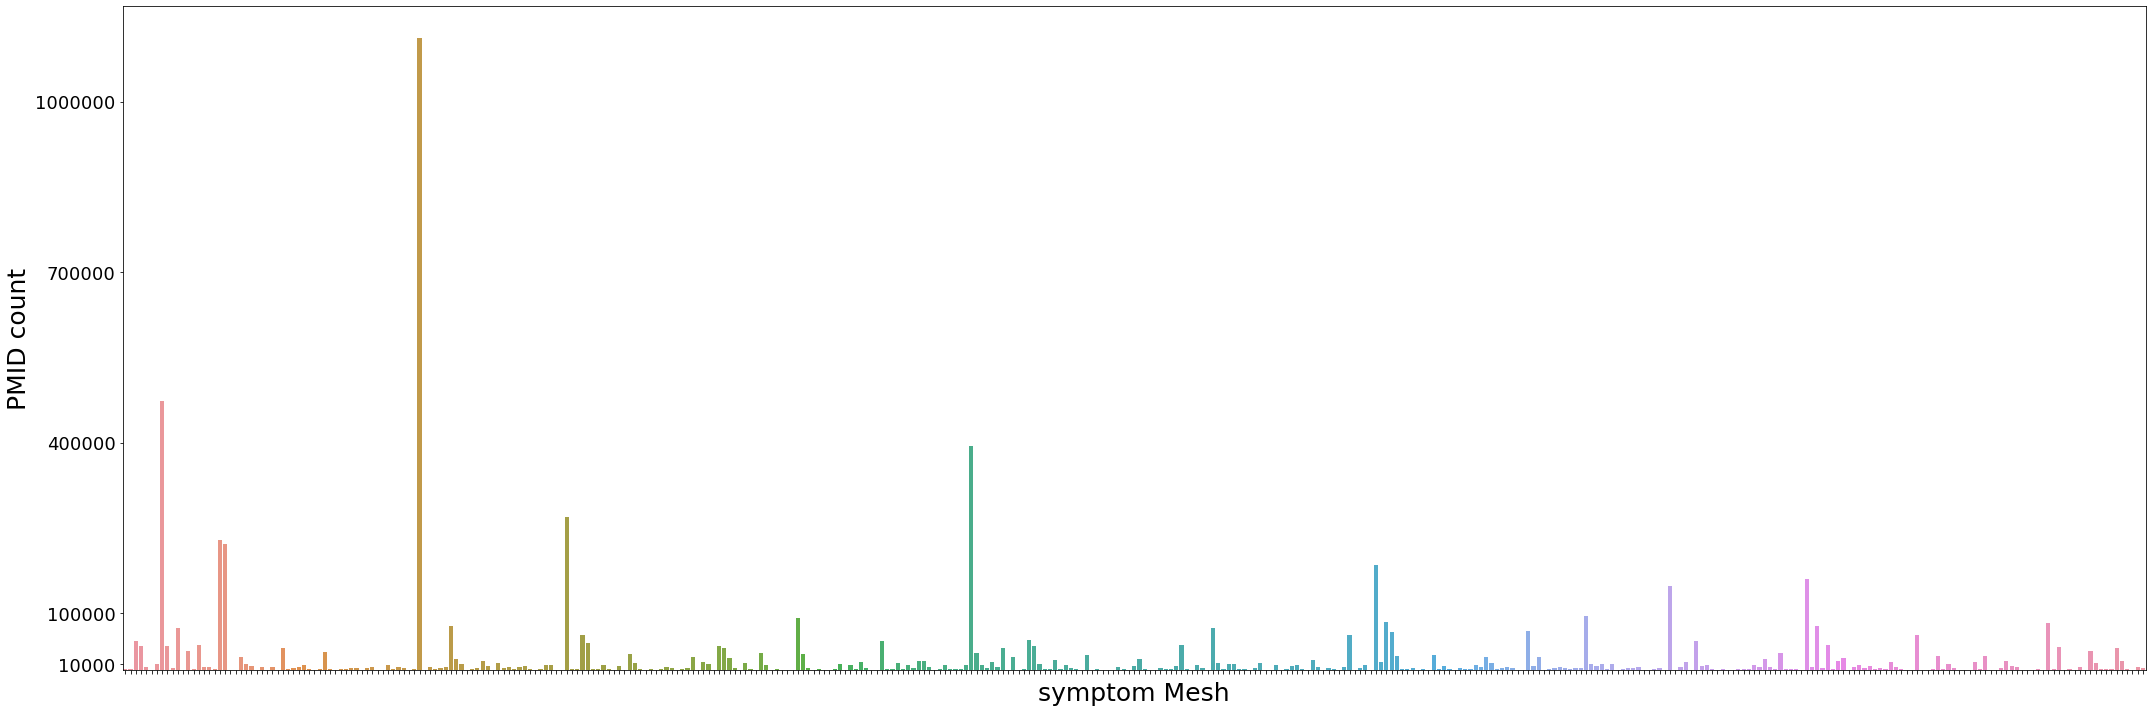

In [110]:
y_scale =[10000,100000,400000,700000,1000000]

plt.figure(figsize=(30,10))

ax = sns.barplot(data=sym_count,orient="v")
ax.set_xticklabels(labels=[])
ax.set_yticklabels(labels=y_scale,fontsize=18)
ax.set_yticks(y_scale)

plt.xlabel(xlabel="symptom Mesh",fontsize=25)
plt.ylabel(ylabel="PMID count",fontsize=25)
plt.tight_layout()

# plt.savefig("sym_count.png",dpi=200)
plt.show()

In [102]:
import os 

### Count the number of pmids related to diseases

In [105]:
dis_count_dic ={}
for dis_file in os.listdir("dis_PMIDlist"):
    if dis_file==".ipynb_checkpoints":
        continue
    dis_name = dis_file.split(".")[0]
    dis_df = pd.read_csv("dis_PMIDlist/{}".format(dis_file),index_col=0)
    dis_count_dic[dis_name]=len(dis_df)
    
dis_count_df = pd.DataFrame(dis_count_dic,index=["count"])
# dis_count_df.to_csv("dis_PMID_count.csv")

E:\Anaconda\envs\tf2\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  else:


In [3]:
dis_count = pd.read_csv("dis_PMID_count.csv",index_col=0)
dis_count.head()

,22q11 Deletion Syndrome,"46, XX Disorders of Sex Development","46, XX Testicular Disorders of Sex Development",Abdominal Abscess,Abdominal Injuries,Abdominal Neoplasms,Abducens Nerve Diseases,Abducens Nerve Injury,Aberrant Crypt Foci,Abetalipoproteinemia,...,Yersinia Infections,Yersinia pseudotuberculosis Infections,Zellweger Syndrome,Zenker Diverticulum,Zika Virus Infection,Zollinger-Ellison Syndrome,Zoonoses,Zoster Sine Herpete,Zygomatic Fractures,Zygomycosis
count,1929,1870,48,8113,13848,25337,896,76,180,379,...,6494,707,403,774,4398,1707,7730,30,1079,3753


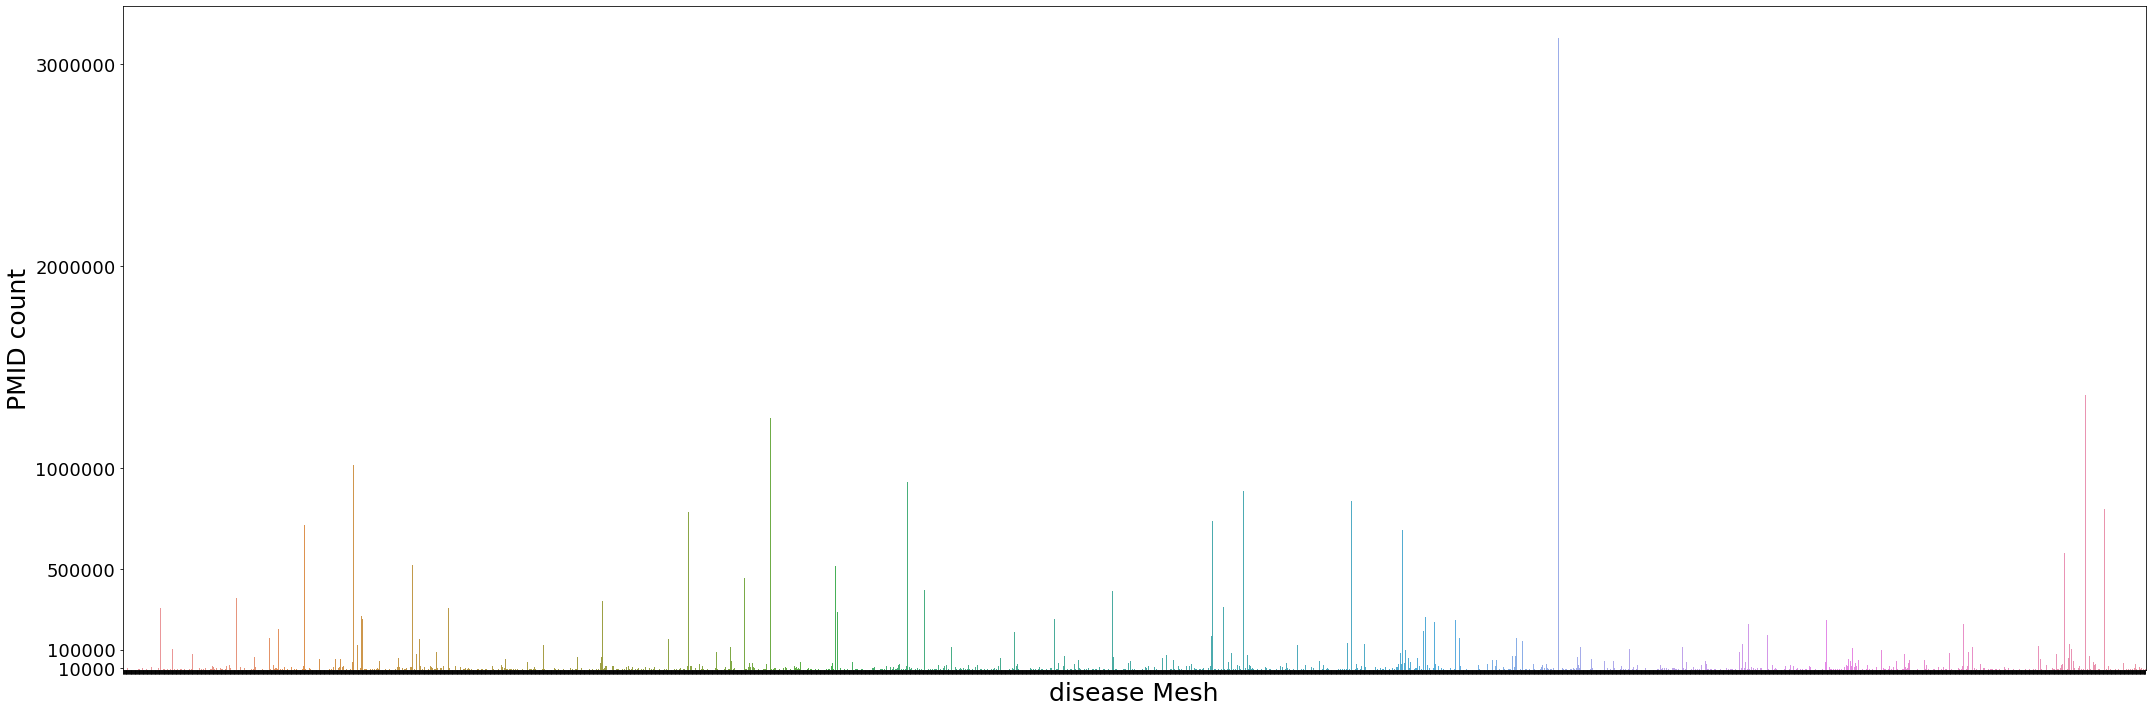

In [112]:
y_scale =[10000,100000,500000,1000000,2000000,3000000]

plt.figure(figsize=(30,10))

ax = sns.barplot(data=dis_count,orient="v")
ax.set_xticklabels(labels=[])
ax.set_yticklabels(labels=y_scale,fontsize=18)
ax.set_yticks(y_scale)

plt.xlabel(xlabel="disease Mesh",fontsize=25)
plt.ylabel(ylabel="PMID count",fontsize=25)
plt.tight_layout()

plt.savefig("dis_count.png",dpi=200)
plt.show()

### Remove items in the disease that are also symptoms,  heat map
    1.4536--->4269--->4268
    2.Some mesh entries are both diseases and symptoms。

In [3]:
fea_new = pd.read_csv("Feature2020.csv",index_col=0)
print(fea_new.shape)
fea_new.head()

(385, 4536)


,"Mesothelioma, Cystic",Palatal Neoplasms,Hemangiosarcoma,DNA Repair-Deficiency Disorders,"Nevus, Pigmented",Pediatric Obesity,Rubella,Staghorn Calculi,"Neoplasms, Post-Traumatic",Duodenogastric Reflux,...,Xeroderma Pigmentosum,Heat Stress Disorders,Occupational Stress,"Cardiomyopathy, Hypertrophic","Epilepsies, Partial",Kleine-Levin Syndrome,Pelvic Neoplasms,Lumpy Skin Disease,Hemochromatosis,Sigmoid Diseases
Pediatric Obesity,0,0,0,0,0,8504,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Orthostatic Intolerance,0,0,2,0,0,0,1,0,0,0,...,0,16,0,17,8,0,0,0,1,0
Seizures,0,0,2,6,21,0,11,0,0,0,...,1,18,0,1,2523,0,3,0,0,1
Muscle Weakness,0,0,3,2,6,0,1,0,0,0,...,0,1,0,9,31,0,0,0,1,0
Persistent Vegetative State,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
uni_dis = (set(fea_new.index) ^ set(fea_new.columns)) & set(fea_new.columns) #获取不同元素
print("去重后的疾病数量：",len(uni_dis))
fea_new_dropdup = fea_new[list(uni_dis)]
print(fea_new_dropdup.shape)
fea_new_dropdup.head()

去重后的疾病数量： 4269
(385, 4269)


,"Nevus, Intradermal",Superinfection,Coloboma,"Abnormalities, Radiation-Induced",Bronchial Hyperreactivity,"Amyloidosis, Familial","Puberty, Delayed",Pilonidal Sinus,"Hematoma, Subdural, Chronic",Cardiovirus Infections,...,Sulfatidosis,Hypophosphatasia,Adenofibroma,Uterine Cervical Dysplasia,Nephrotic Syndrome,"Keratosis, Actinic",Canaliculitis,Foot Injuries,Retroperitoneal Neoplasms,Periodontal Diseases
Pediatric Obesity,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,4
Orthostatic Intolerance,0,0,0,0,0,8,0,0,2,0,...,0,0,0,0,2,0,0,0,0,2
Seizures,0,0,8,1,0,2,0,0,28,10,...,6,19,1,0,12,0,0,5,2,12
Muscle Weakness,0,1,0,0,0,5,0,0,19,0,...,2,3,0,0,10,0,0,1,3,6
Persistent Vegetative State,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
np.max(np.max(fea_new_dropdup))
#Pathological Conditions, Signs and Symptoms
#Neurologic Manifestations

784271

#### Further delete "Pathological Conditions, Signs and Symptoms" terms.

In [48]:
fea_new = pd.read_csv("Feature2020_dropdup.csv",index_col=0)
fea_new.shape

(385, 4268)

In [10]:
fea_new = fea_new.drop(["Pathological Conditions, Signs and Symptoms"],axis=1)
fea_new.shape

KeyError: "['Pathological Conditions, Signs and Symptoms'] not found in axis"

In [11]:
np.max(np.max(fea_new))

632249

In [66]:
# fea_new.to_csv("Feature2020_dropdup.csv")

### Computing TF-IDF

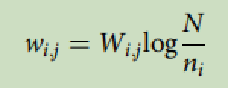
disease j，symptom i；
N：Total number of diseases；
ni：Number of diseases which co-occurring with symptom i。


In [67]:
fea_new = fea_new.T
#（4268，385）

In [68]:
ni = (fea_new != 0).astype(int).sum(axis=0)
print(len(ni))

385


In [69]:
log_N_ni = np.log(4268/ni)
log_N_ni

Pediatric Obesity               1.943804
Orthostatic Intolerance         1.429384
Seizures                        0.576510
Muscle Weakness                 0.635781
Persistent Vegetative State     2.201922
                                  ...   
Muscle Hypertonia               1.108265
Hearing Loss, Functional        3.417258
Breakthrough Pain               3.588216
Mutism                          2.258582
Cerebrospinal Fluid Otorrhea    2.377486
Length: 385, dtype: float64

In [142]:
log_fea_new = fea_new*log_N_ni
print(log_fea_new.shape)
log_fea_new.head()

(4268, 385)


,Pediatric Obesity,Orthostatic Intolerance,Seizures,Muscle Weakness,Persistent Vegetative State,Chills,Sweating Sickness,Ataxia,Nocturia,Fetal Distress,...,Hypercalciuria,Chronic Pain,Hematemesis,Angina Pectoris,"Vision, Low",Muscle Hypertonia,"Hearing Loss, Functional",Breakthrough Pain,Mutism,Cerebrospinal Fluid Otorrhea
"Nevus, Intradermal",0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Superinfection,0.0,0.0,0.000000,0.635781,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.309646,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Coloboma,0.0,0.0,4.612082,0.000000,0.0,0.0,0.0,9.635946,0.0,0.0,...,0.0,0.000000,0.0,0.00000,5.881313,0.0,0.0,0.0,0.0,0.0
"Abnormalities, Radiation-Induced",0.0,0.0,0.576510,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.309646,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Bronchial Hyperreactivity,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,2.27413,0.000000,0.0,0.0,0.0,0.0,0.0


In [72]:
# log_fea_new.to_csv("2020_TF-IDF_dropdup.csv")

#### tf-idf of 4536 diseases

In [5]:
fea_all = pd.read_csv("Feature2020.csv",index_col=0)
fea_all = fea_all.T
print(fea_all.shape)

ni = (fea_all != 0).astype(int).sum(axis=0)
print(len(ni))

log_N_ni = np.log(4536/ni)
log_N_ni

log_fea_all = fea_all*log_N_ni
print(log_fea_all.shape)
log_fea_all.head()

(4536, 385)
385
(4536, 385)


,Pediatric Obesity,Orthostatic Intolerance,Seizures,Muscle Weakness,Persistent Vegetative State,Chills,Sweating Sickness,Ataxia,Nocturia,Fetal Distress,...,Hypercalciuria,Chronic Pain,Hematemesis,Angina Pectoris,"Vision, Low",Muscle Hypertonia,"Hearing Loss, Functional",Breakthrough Pain,Mutism,Cerebrospinal Fluid Otorrhea
"Mesothelioma, Cystic",0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0
Palatal Neoplasms,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.779678,0.0,0.0,...,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0000,0.0
Hemangiosarcoma,0.0,2.779656,1.116918,1.869995,0.0,0.0,0.0,3.898388,0.0,0.0,...,0.0,0.000000,3.01014,5.623722,0.000000,1.078317,0.0,0.0,2.1545,0.0
DNA Repair-Deficiency Disorders,0.0,0.000000,3.350754,1.246663,0.0,0.0,0.0,1716.070558,0.0,0.0,...,0.0,0.000000,1.50507,1.124744,1.460402,3.234951,0.0,0.0,0.0000,0.0
"Nevus, Pigmented",0.0,0.000000,11.727640,3.739990,0.0,0.0,0.0,1.559355,0.0,0.0,...,0.0,1.288102,0.00000,0.000000,0.000000,3.234951,0.0,0.0,0.0000,0.0


In [6]:
#log_fea_all.to_csv("2020_TF-IDF.csv")

### visualization

#### Histogram of maximum value of disease features

In [14]:
log_fea_new = pd.read_csv("2020_TF-IDF_dropdup.csv",index_col=0)
log_fea_new.head()

,Pediatric Obesity,Orthostatic Intolerance,Seizures,Muscle Weakness,Persistent Vegetative State,Chills,Sweating Sickness,Ataxia,Nocturia,Fetal Distress,...,Hypercalciuria,Chronic Pain,Hematemesis,Angina Pectoris,"Vision, Low",Muscle Hypertonia,"Hearing Loss, Functional",Breakthrough Pain,Mutism,Cerebrospinal Fluid Otorrhea
"Nevus, Intradermal",0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Superinfection,0.0,0.0,0.000000,0.635781,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.309646,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Coloboma,0.0,0.0,4.612082,0.000000,0.0,0.0,0.0,9.635946,0.0,0.0,...,0.0,0.000000,0.0,0.00000,5.881313,0.0,0.0,0.0,0.0,0.0
"Abnormalities, Radiation-Induced",0.0,0.0,0.576510,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,1.309646,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
Bronchial Hyperreactivity,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.000000,0.0,2.27413,0.000000,0.0,0.0,0.0,0.0,0.0


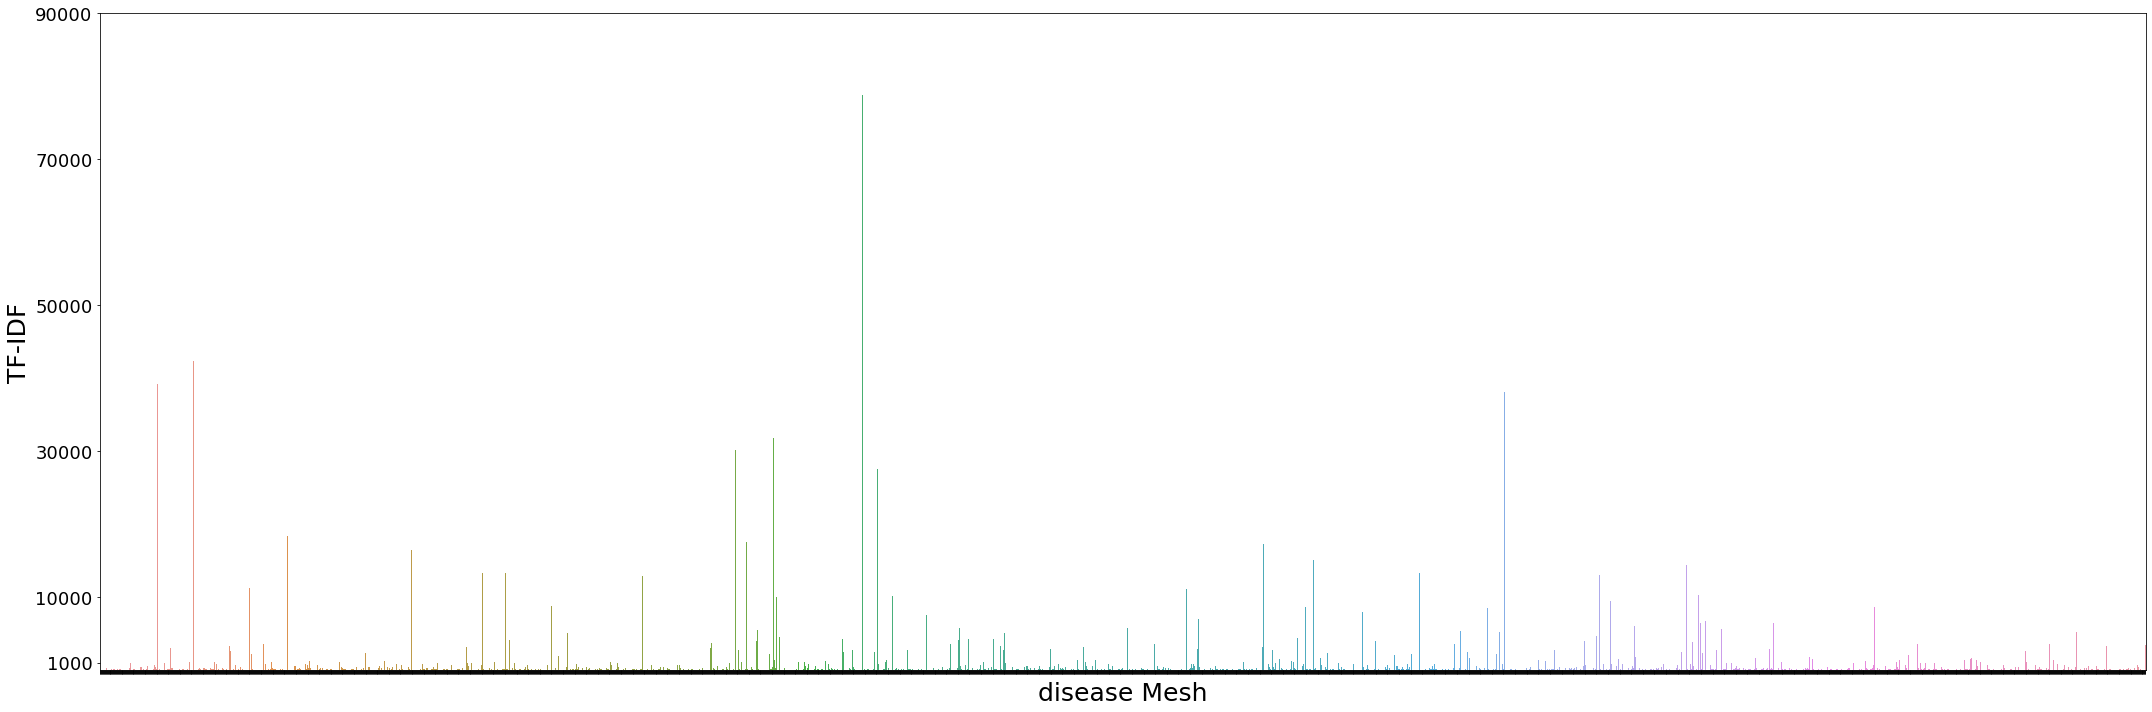

In [144]:
plt.figure(figsize=(30,10))

scale=[10,100,1000,10000,100000]
ax = sns.barplot(data=pd.DataFrame(np.max(log_fea_new,axis=1)).T,orient="v")

ax.set_xticklabels(labels=[])
ax.set_yticklabels(labels=y_scale,fontsize=18)
ax.set_yticks(y_scale)
# ax.set_yscale("log")

plt.xlabel(xlabel="disease Mesh",fontsize=25)
plt.ylabel(ylabel="TF-IDF",fontsize=25)
plt.tight_layout()

# plt.savefig("tf-idf.png",dpi=200)
plt.show()

#### heatmap
    TF-IDF log-trans,

In [4]:
dis_unique = pd.read_csv("../final/cls_siamese/Mesh_files/Mesh_disease_unique.csv",index_col=0)
print(dis_unique.shape)
dis_unique.head()

(4536, 2)


,Mesh_dis_name,Mesh_id
0,Infections,C01
1,"Aneurysm, Infected",C01.069
2,"Arthritis, Infectious",C01.100
3,"Arthritis, Reactive",C01.100.500
4,Asymptomatic Infections,C01.125


In [54]:
#Arrange mesh-terms in the order of diseases in the document file_new
fea_new_T = fea_new.T
order_dis_fea=fea_new_T.loc[dis_unique["Mesh_dis_name"]]
order_dis_fea.head()

,Pediatric Obesity,Orthostatic Intolerance,Seizures,Muscle Weakness,Persistent Vegetative State,Chills,Sweating Sickness,Ataxia,Nocturia,Fetal Distress,...,Hypercalciuria,Chronic Pain,Hematemesis,Angina Pectoris,"Vision, Low",Muscle Hypertonia,"Hearing Loss, Functional",Breakthrough Pain,Mutism,Cerebrospinal Fluid Otorrhea
Infections,62,142,2886,1249,33,111,6,886,8,54,...,13,272,153,255,103,322,2,0,22,100
"Aneurysm, Infected",0,0,0,5,0,0,0,0,0,0,...,0,0,6,3,1,0,0,0,0,0
"Arthritis, Infectious",0,0,1,3,0,0,0,4,0,0,...,0,2,0,1,0,0,0,0,0,0
"Arthritis, Reactive",0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asymptomatic Infections,0,0,2,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Arrange mesh-terms in the order of symptoms in the document file_new
sym_unique = pd.read_csv("../final/cls_siamese/Mesh_files/Mesh_symptom.csv",index_col=0)
sym_unique.head()

,Mesh_sym_name,Mesh_id
0,"Aging, Premature",C23.888.069
1,Asthenia,C23.888.089
2,Body Temperature Changes,C23.888.119
3,Fever,C23.888.119.344
4,Fever of Unknown Origin,C23.888.119.344.345


In [56]:
order_dis_fea_T=order_dis_fea.T
order_dis_sym_fea=order_dis_fea_T.loc[sym_unique["Mesh_sym_name"]]
order_dis_sym_fea.head()

,Infections,"Aneurysm, Infected","Arthritis, Infectious","Arthritis, Reactive",Asymptomatic Infections,Bacterial Infections and Mycoses,Bacterial Infections,Bacteremia,Hemorrhagic Septicemia,Central Nervous System Bacterial Infections,...,Myocardial Contusions,War-Related Injuries,"Wounds, Nonpenetrating",Contusions,"Wounds, Penetrating",Corpse Dismemberment,Decapitation,"Wounds, Gunshot","Wounds, Stab",Needlestick Injuries
"Aging, Premature",39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asthenia,155,0,0,0,0,59,54,2,0,6,...,0,0,7,0,1,0,0,0,1,1
Body Temperature Changes,16300,45,117,8,10,6839,6194,696,0,287,...,0,1,34,5,38,0,0,12,11,7
Fever,16027,45,117,8,10,6771,6133,681,0,282,...,0,0,17,3,21,0,0,3,8,7
Fever of Unknown Origin,1866,13,8,2,0,1005,907,86,0,28,...,0,0,2,0,1,0,0,0,0,0


In [21]:
from tensorflow.keras import backend as K
K.epsilon()

1e-07

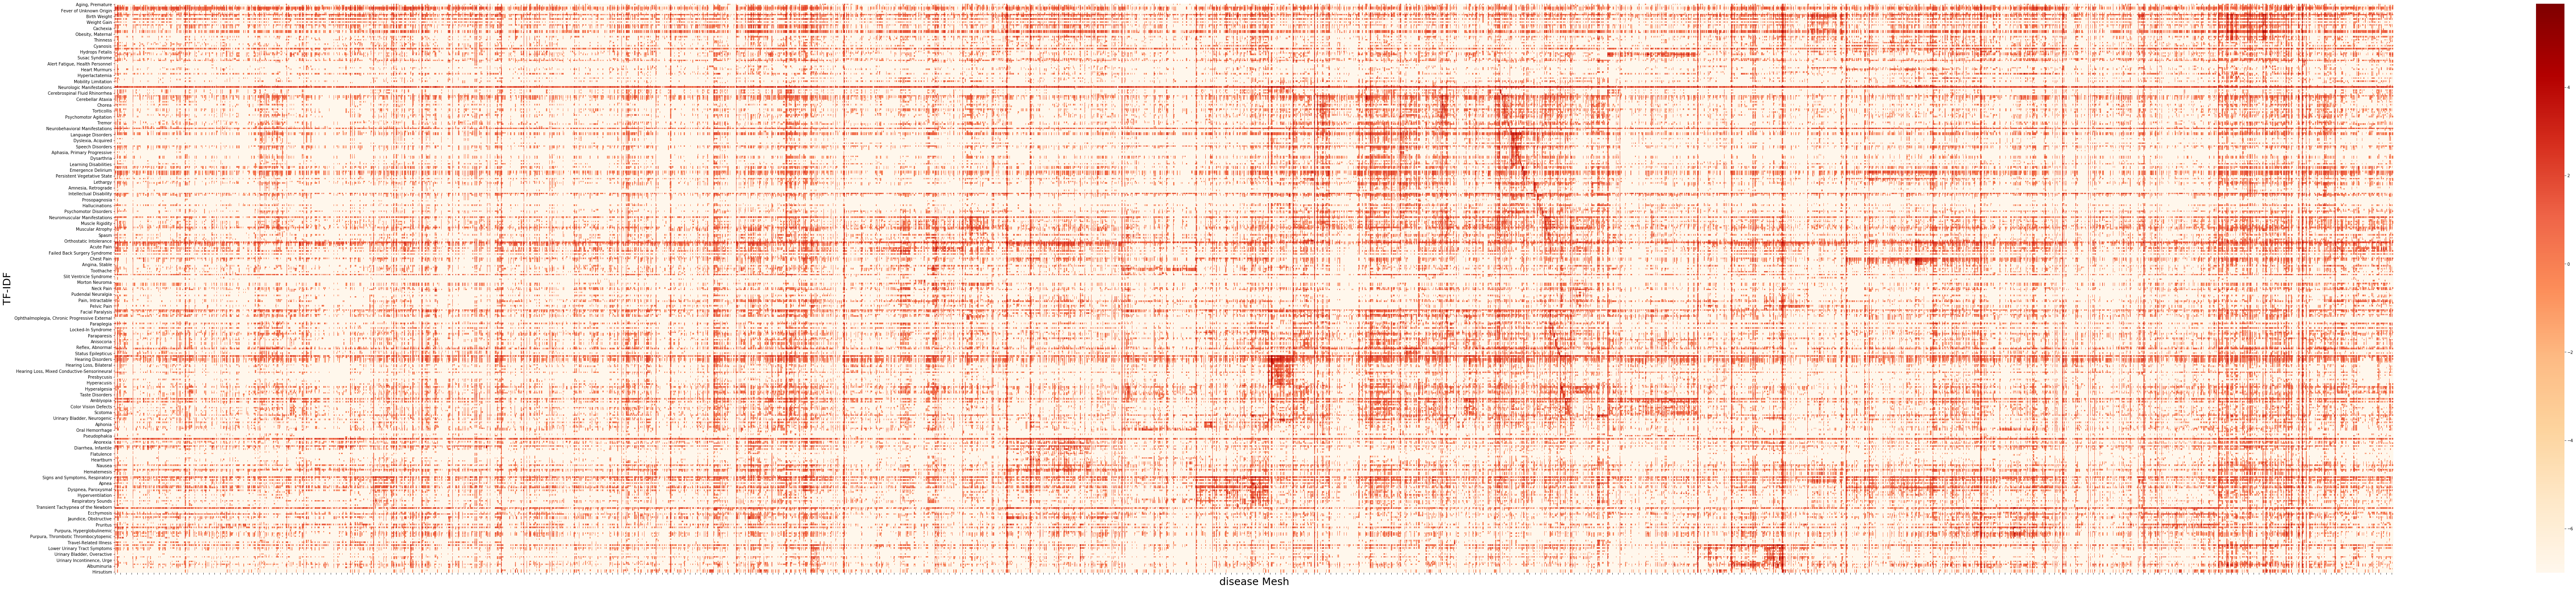

In [63]:
plt.figure(figsize=(100,20))

ax = sns.heatmap(data=pd.DataFrame(np.log10(order_dis_sym_fea+K.epsilon())),cmap="OrRd")

ax.set_xticklabels(labels=[])


plt.xlabel(xlabel="disease Mesh",fontsize=25)
plt.ylabel(ylabel="TF-IDF",fontsize=25)
plt.tight_layout()

plt.savefig("tf-idf-log.png",dpi=200)
plt.show()

#### Compare old and new features

In [141]:
np.max(log_fea_new.describe().loc["max"])

85625.54670694767

In [42]:
older_fea = pd.read_csv("../final/dis_fea.csv",index_col=0)
print(older_fea.shape)
older_fea.head()

(4219, 322)


,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
Postoperative Complications,77.405877,45.274396,137.051962,116.979213,109.871700,81.379911,170.673499,7.243573,156.893356,82.936179,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.654206,0.0
Brain Diseases,17.457496,25.038113,22.643368,64.369514,594.997516,269.792098,33.302146,356.745994,45.549684,161.227932,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Pain,16235.800255,48.704274,193.660381,96.554271,48.174515,387.439144,69.101953,23.541614,92.786393,13.933278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Cerebral Infarction,50.396166,26.753052,16.684587,40.230946,185.091557,107.032275,75.762382,9.959914,16.026741,85.590137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
Epilepsy,31.950511,50.076226,3.575269,58.180137,2045.303960,114.993353,46.623004,808.563889,37.114557,49.761707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [43]:
older_fea.describe()

,0,1,2,3,4,5,6,7,8,9,...,312,313,314,315,316,317,318,319,320,321
count,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,...,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000,4219.000000
mean,8.277920,5.312613,3.576398,3.897004,8.364528,5.466729,18.914893,9.819987,2.498349,4.325498,...,0.018064,0.054192,0.013119,0.023324,0.034170,0.034170,0.010621,0.000400,0.003628,0.001979
std,250.494166,50.121098,13.877422,18.036353,240.453329,119.543322,650.120928,238.752515,10.099085,95.104243,...,0.349133,1.970701,0.283784,0.598455,1.231675,1.564746,0.260563,0.018387,0.166632,0.128512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.329387,0.342988,0.595878,0.618938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.305707,1.714939,2.383512,1.856813,1.690334,1.769129,1.665107,1.810893,1.687025,1.326979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16235.800255,2709.946980,432.607496,765.006914,15436.973895,7672.710345,41794.193312,15212.409739,189.790350,6103.439284,...,11.724894,123.111382,6.150129,24.600515,68.947031,100.286590,6.401443,0.844615,7.654206,8.347353


In [44]:
np.max(older_fea.describe().loc["max"])

41794.19331211054

### Use partial disease feature visualization
    1.Select digestive system diseases [C06] and nervous system diseases [C10]
    2.Total 880 diseases，C06：228，C10：652

In [5]:
dis_unique.head()

,Mesh_dis_name,Mesh_id
0,Infections,C01
1,"Aneurysm, Infected",C01.069
2,"Arthritis, Infectious",C01.100
3,"Arthritis, Reactive",C01.100.500
4,Asymptomatic Infections,C01.125


In [18]:
flag = [x[0] in ["C06","C10"] for x in dis_unique["Mesh_id"].str.split(".")]#提取C06和C10的疾病

part6_10_dis = dis_unique[flag]
print(part6_10_dis.shape)
part6_10_dis.head()

(880, 2)


,Mesh_dis_name,Mesh_id
2888,Digestive System Diseases,C06
2889,Biliary Tract Diseases,C06.130
2890,Bile Duct Diseases,C06.130.120
2893,Biliary Atresia,C06.130.120.123
2895,Caroli Disease,C06.130.120.127.500


In [19]:
#1、Arrange mesh-terms in the order of symptoms in the document file_new
fea_new_T = fea_new.T
part_dis_fea=fea_new_T.loc[part6_10_dis["Mesh_dis_name"]]
part_dis_fea.head()

,Pediatric Obesity,Orthostatic Intolerance,Seizures,Muscle Weakness,Persistent Vegetative State,Chills,Sweating Sickness,Ataxia,Nocturia,Fetal Distress,...,Hypercalciuria,Chronic Pain,Hematemesis,Angina Pectoris,"Vision, Low",Muscle Hypertonia,"Hearing Loss, Functional",Breakthrough Pain,Mutism,Cerebrospinal Fluid Otorrhea
Digestive System Diseases,275,100,773,314,7,18,1,354,4,80,...,14,269,1662,409,15,116,1,5,5,1
Biliary Tract Diseases,6,6,21,11,0,2,0,16,0,25,...,1,8,33,44,0,3,0,0,0,0
Bile Duct Diseases,0,5,17,6,0,1,0,15,0,25,...,0,0,15,9,0,2,0,0,0,0
Biliary Atresia,0,0,4,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Caroli Disease,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [26]:
#2、Arrange mesh-terms in the order of symptoms in the document file_new
sym_unique = pd.read_csv("../final/cls_siamese/Mesh_files/Mesh_symptom.csv",index_col=0)

part_dis_fea_T=part_dis_fea.T
order_part_dis_fea=part_dis_fea_T.loc[sym_unique["Mesh_sym_name"]]
order_part_dis_fea.head()

,Digestive System Diseases,Biliary Tract Diseases,Bile Duct Diseases,Biliary Atresia,Caroli Disease,Cholestasis,"Cholestasis, Extrahepatic","Cholestasis, Intrahepatic",Alagille Syndrome,"Liver Cirrhosis, Biliary",...,Mandibular Injuries,Orbital Fractures,Zygomatic Fractures,"Head Injuries, Closed",Contrecoup Injury,Post-Concussion Syndrome,"Head Injuries, Penetrating",Skull Fractures,"Skull Fracture, Basilar","Skull Fracture, Depressed"
"Aging, Premature",14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Asthenia,147,8,3,0,0,2,0,0,0,0,...,0,0,0,7,0,0,0,0,0,0
Body Temperature Changes,2731,240,130,0,10,44,3,6,0,2,...,0,0,0,7,0,0,1,5,0,0
Fever,2583,238,130,0,10,44,3,6,0,2,...,0,0,0,5,0,0,0,4,0,0
Fever of Unknown Origin,402,36,18,0,2,7,2,2,0,2,...,0,0,0,1,0,0,0,0,0,0


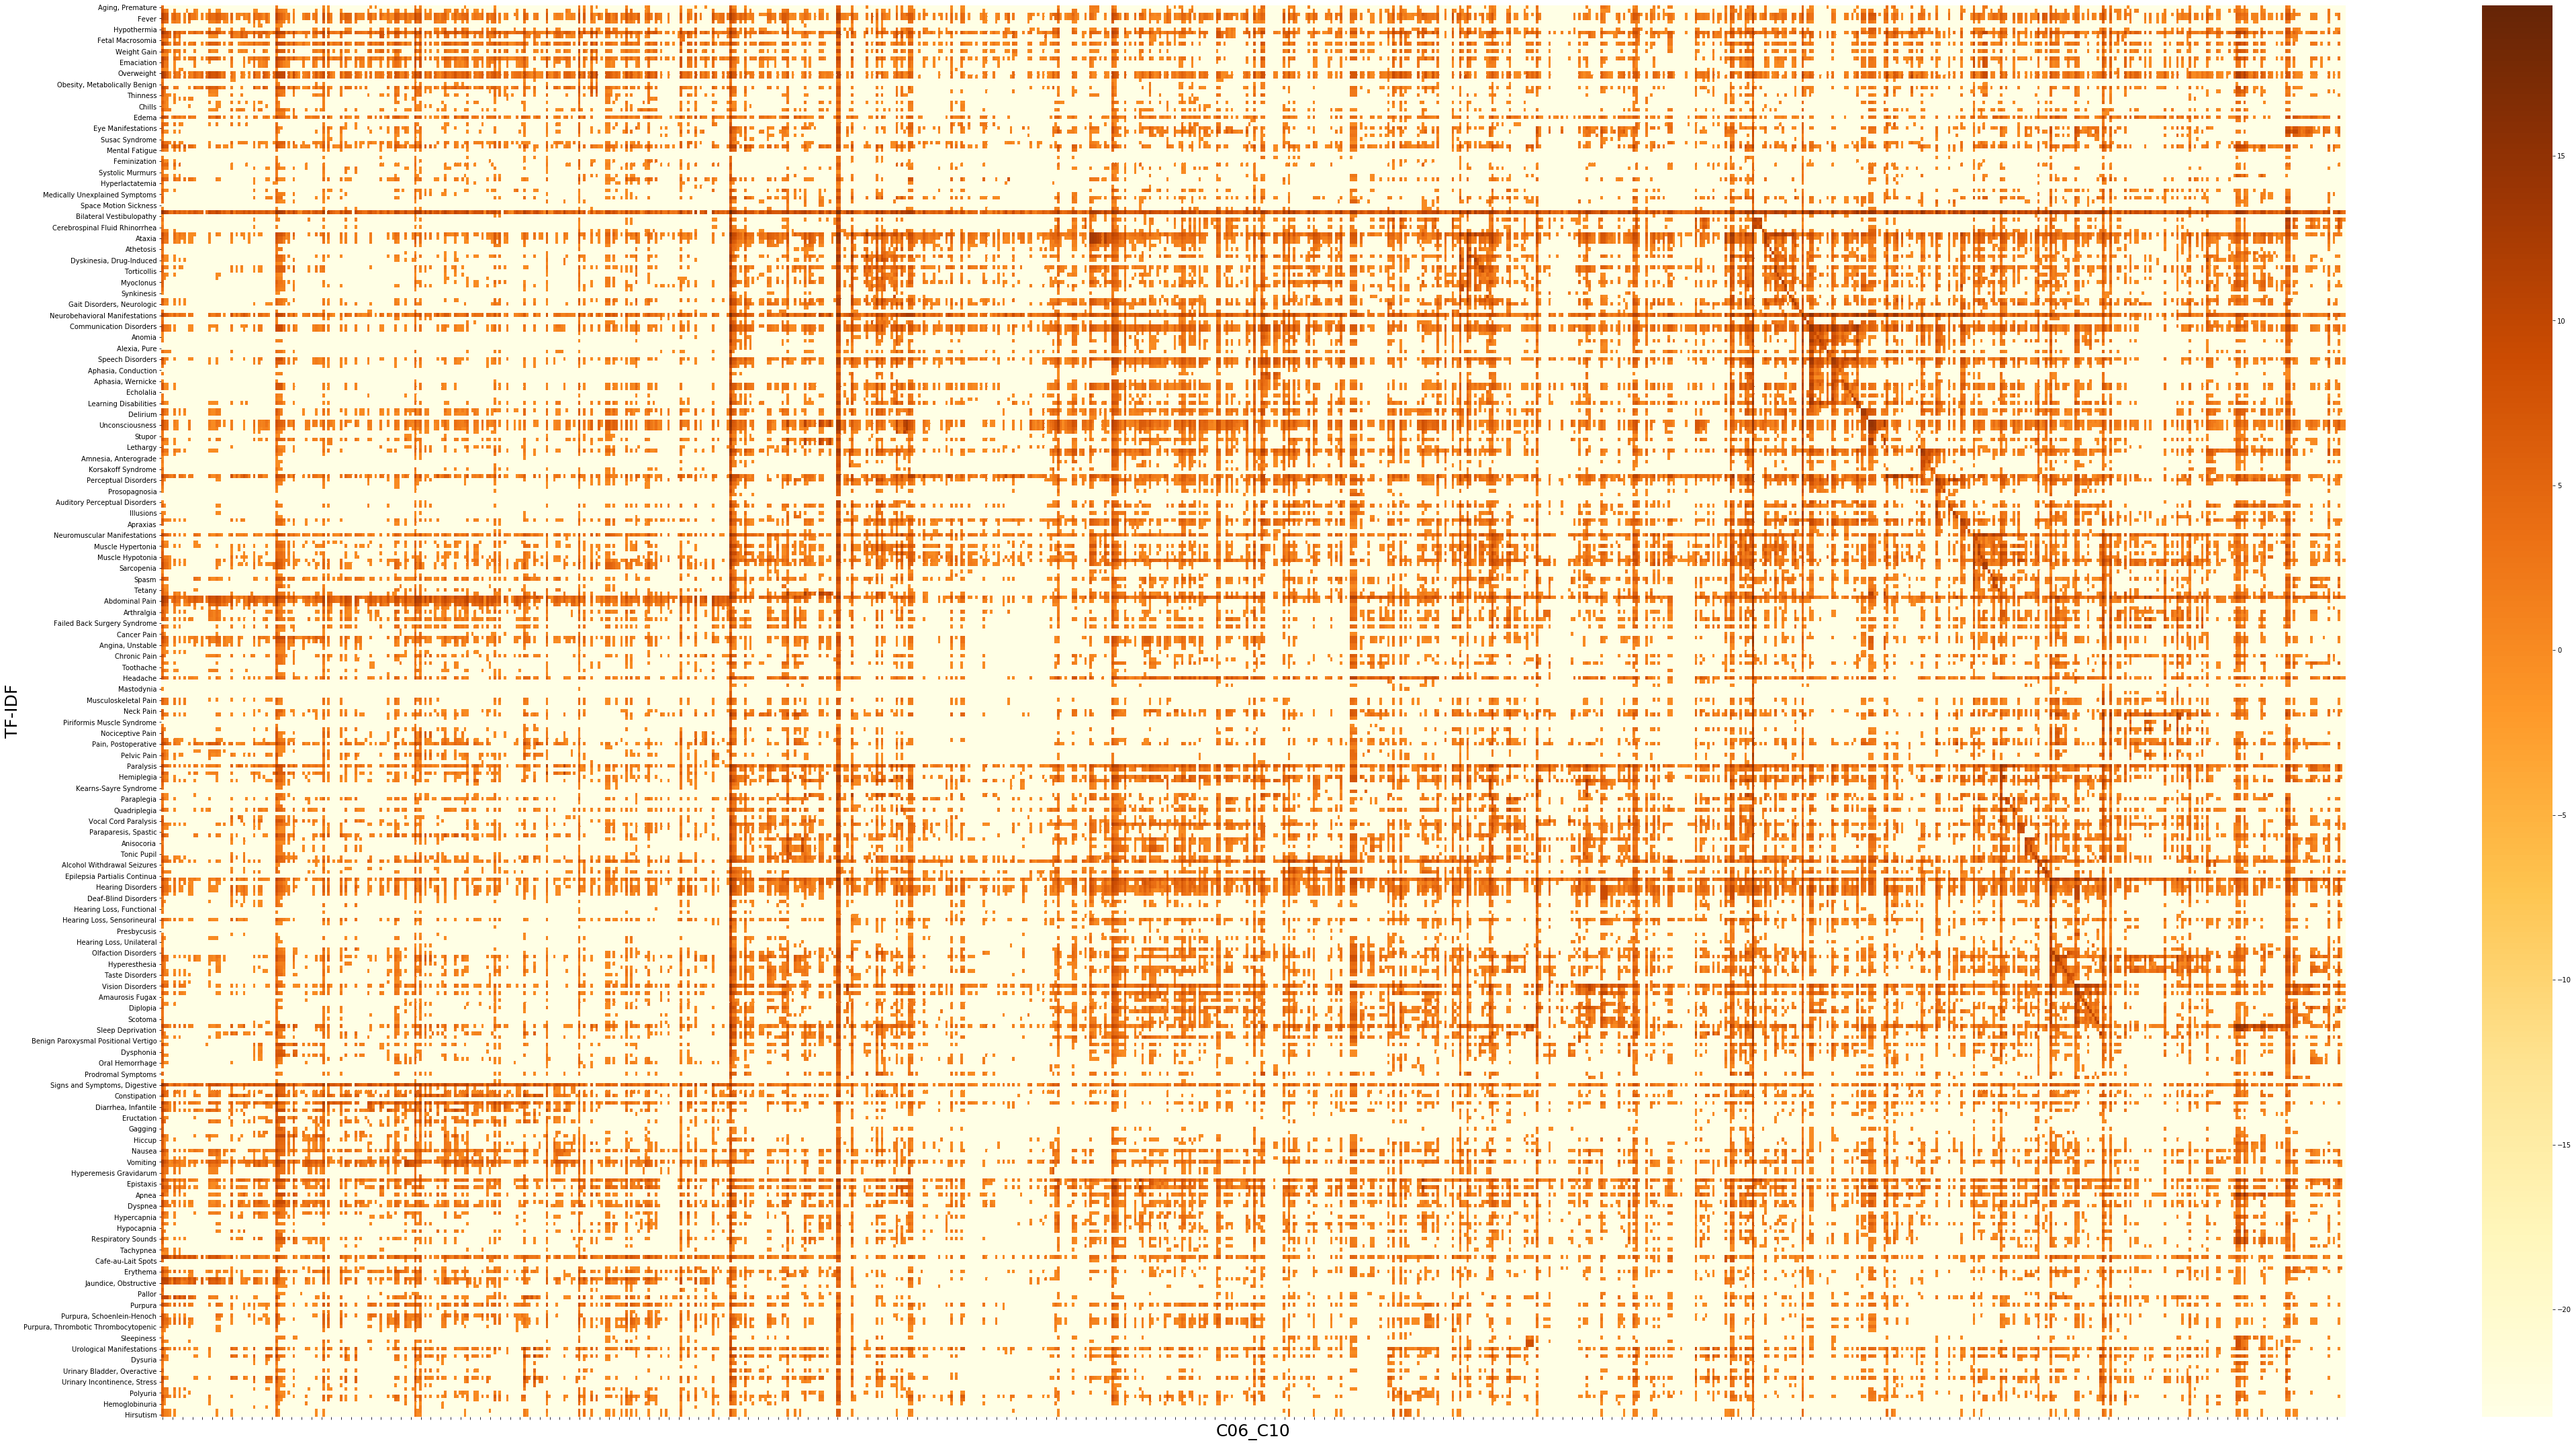

In [35]:
plt.figure(figsize=(60,30))

data=pd.DataFrame(np.log2(order_part_dis_fea+K.epsilon()))

ax = sns.heatmap(data,cmap="YlOrBr")

ax.set_xticklabels(labels=[])


plt.xlabel(xlabel="C06_C10",fontsize=25)
plt.ylabel(ylabel="TF-IDF",fontsize=25)
plt.tight_layout()

plt.savefig("tf-idf-log-C06-C10.png",dpi=200)
plt.show()